In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

file_path = '5_results.csv'
if not os.path.exists(file_path):
    print(f"Ошибка: Файл {file_path} не найден.")
    exit()

df = pd.read_csv(file_path)

# Расчет T_1 (Базовое время на 1 процессе для каждого сценария)
# это время, где Nodes=1 и Processes=1
try:
    base_times = df[(df['Nodes'] == 1) & (df['Processes'] == 1)].set_index('Scenario')['Time_s'].to_dict()
except IndexError:
    print("Ошибка: В данных нет запуска 1:1 (Nodes=1, Processes=1), невозможно посчитать ускорение.")
    exit()

df['T_1'] = df['Scenario'].map(base_times)          
df['Speedup'] = df['T_1'] / df['Time_s']            
df['Efficiency'] = df['Speedup'] / df['Processes']  

unique_nodes = sorted(df['Nodes'].unique())
num_nodes = len(unique_nodes)

df.head()

,Scenario,Nodes,Processes,TotalWork,MsgBytes,Time_s,T_1,Speedup,Efficiency
0,ComputeHeavy,1,1,1000000000,1,49.248500,49.248500,1.000000,1.000000
1,LatencyBound,1,1,10000000,100,0.561669,0.561669,1.000000,1.000000
2,BandwidthBound,1,1,10000000,1048576,0.559581,0.559581,1.000000,1.000000
3,MaxBandwidthBound,1,1,1000000,10485760,0.216118,0.216118,1.000000,1.000000
4,ComputeHeavy,1,2,1000000000,1,25.822900,49.248500,1.907164,0.953582


Execution Time vs Processes


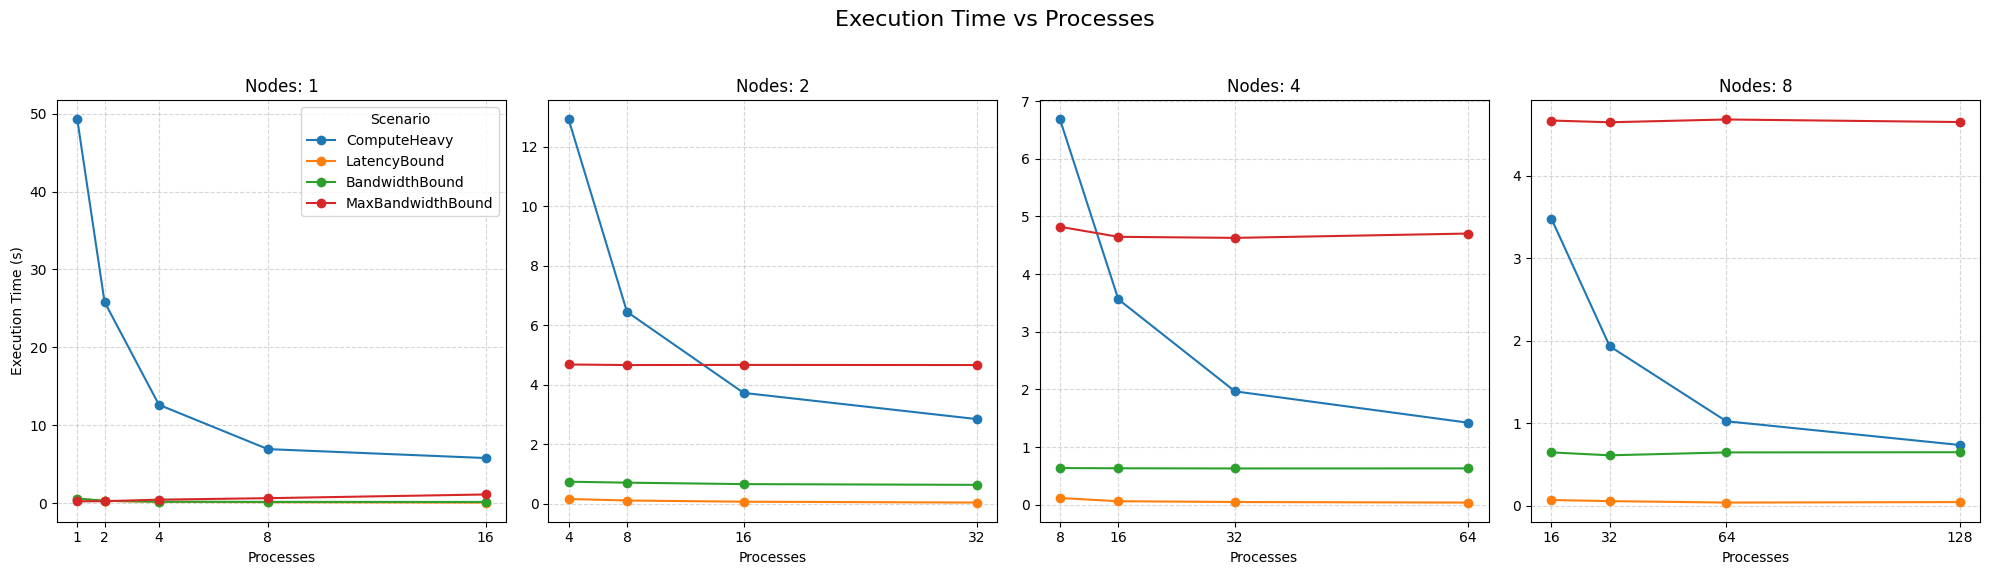

Speedup vs Processes


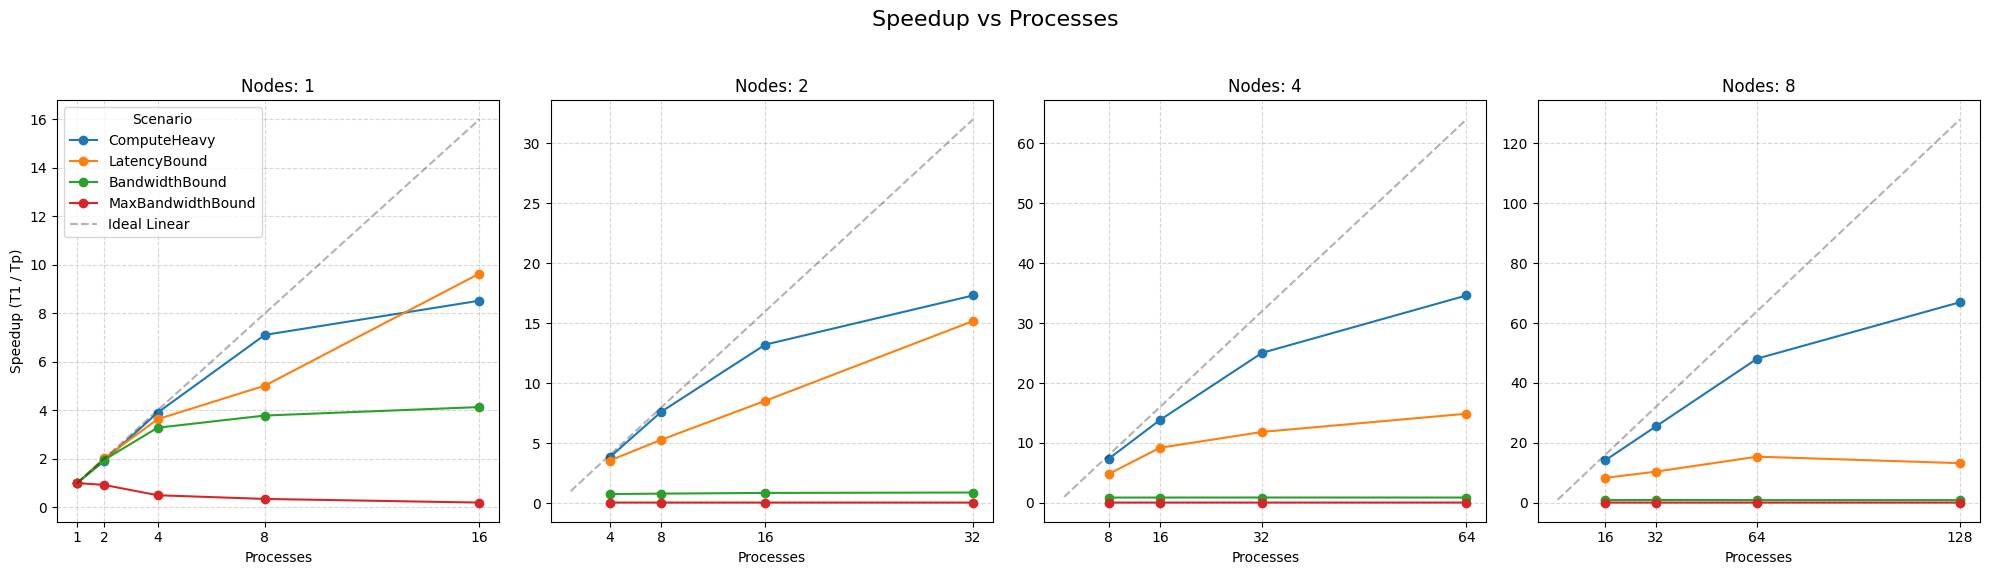

Efficiency vs Processes


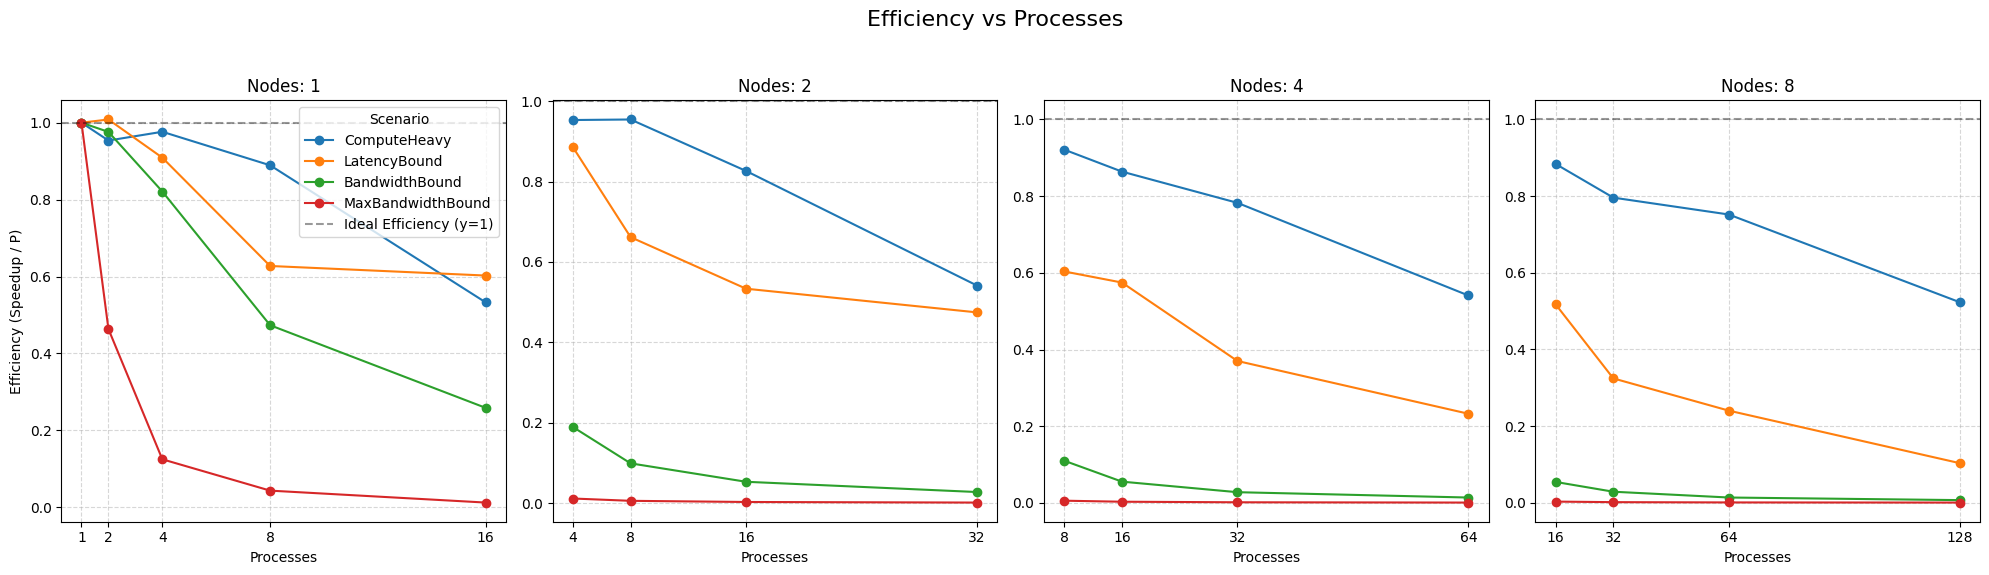

In [5]:
def plot_metric(y_col, y_label, title, log_y=False, ylim=None):
    print(title)
    fig, axes = plt.subplots(1, num_nodes, figsize=(5 * num_nodes, 6), sharey=False)
    if num_nodes == 1:
        axes = [axes]

    for i, node in enumerate(unique_nodes):
        ax = axes[i]
        df_nodes = df[df['Nodes'] == node]
        
        for scenario in df_nodes['Scenario'].unique():
            subset = df_nodes[df_nodes['Scenario'] == scenario].sort_values(by='Processes')
            ax.plot(subset['Processes'], subset[y_col], marker='o', label=f'{scenario}')

        if y_col == 'Speedup':
            max_p = df_nodes['Processes'].max()
            ax.plot([1, max_p], [1, max_p], 'k--', alpha=0.3, label='Ideal Linear')

        elif y_col == 'Efficiency':
            ax.axhline(y=1.0, color='k', linestyle='--', alpha=0.4, label='Ideal Efficiency (y=1)')

        ax.set_title(f'Nodes: {node}')
        ax.set_xlabel('Processes')
        if i == 0:
            ax.set_ylabel(y_label)
        
        ax.grid(True, which="both", ls="--", alpha=0.5)
        
        if log_y:
            ax.set_yscale('log', base=10) 
        if ylim:
            ax.set_ylim(ylim)

        ax.set_xticks(sorted(df_nodes['Processes'].unique()))

        if i == 0:
            ax.legend(title='Scenario', loc='best')

    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


plot_metric(y_col='Time_s', 
            y_label='Execution Time (s)', 
            title='Execution Time vs Processes')

plot_metric(y_col='Speedup', 
            y_label='Speedup (T1 / Tp)', 
            title='Speedup vs Processes')

plot_metric(y_col='Efficiency', 
            y_label='Efficiency (Speedup / P)', 
            title='Efficiency vs Processes', 
            #ylim=(0, 1.2)
            )